<a href="https://colab.research.google.com/github/Stanley2204/TugasDataMining/blob/main/week_8_Stanley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a **customer transaction in a certain mall**. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from **Elearn**

In [48]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/Stanley2204/TugasDataMining/refs/heads/main/view.csv"
df = pd.read_csv(url)
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [49]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={
    'Annual Income (k$)': 'AnnualIncome',
    'Spending Score (1-100)': 'SpendingScore'
})

# Display the first 5 rows
df.head(5)


,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [50]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [51]:
# Check for null values in the dataset
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


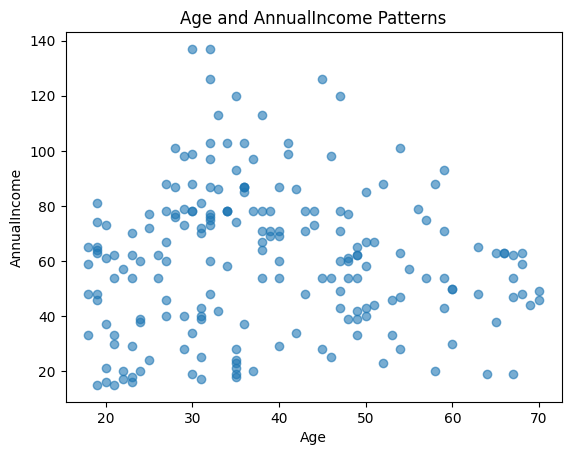

In [52]:
# make an insightful visualization and explain
import matplotlib.pyplot as plt

plt.scatter(df["Age"], df["AnnualIncome"], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("AnnualIncome")
plt.title("Age and AnnualIncome Patterns")
plt.show()

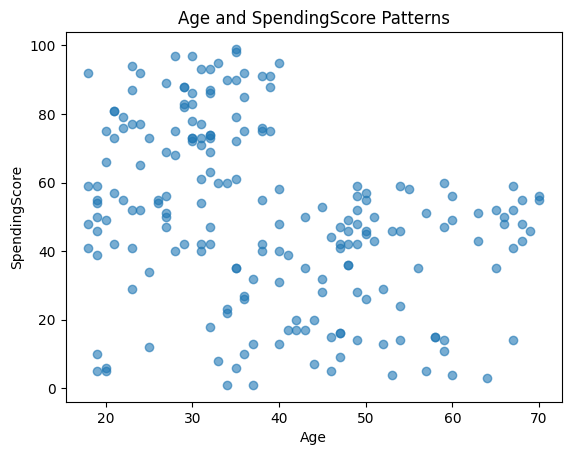

In [53]:
# make an insightful visualization and explain
import matplotlib.pyplot as plt

plt.scatter(df["Age"], df["SpendingScore"], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("SpendingScore")
plt.title("Age and SpendingScore Patterns")
plt.show()


In [54]:
#explaination
#Age and Annual Income: This scatter plot can show if there's any trend or spread in income across different age groups.
#Age and Spending Score: This scatter plot can indicate if there's a pattern in spending behavior across different ages, potentially useful for customer segmentation.

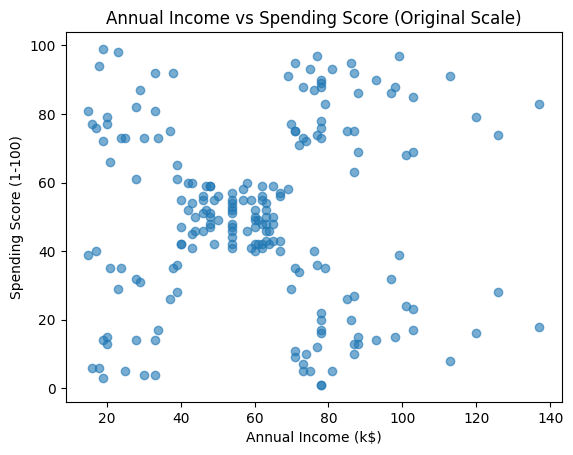

In [55]:
# Visualize the position using the original scale
# Original scale scatter plot for Annual Income vs Spending Score
plt.scatter(df["AnnualIncome"], df["SpendingScore"], alpha=0.6)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs Spending Score (Original Scale)")
plt.show()

## Data Preprocessing

For this case study, we only use income and spending score

In [56]:
# create new dataframe that consist only annual income and spending score
df = df.iloc[:, -2:]
df.head()


,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [57]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df = pd.DataFrame(sc.fit_transform(df), columns=["AnnualIncome", "SpendingScore"])

df.head()

,AnnualIncome,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [58]:
# get stastical information on the new dataset
df.describe()

,AnnualIncome,SpendingScore
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

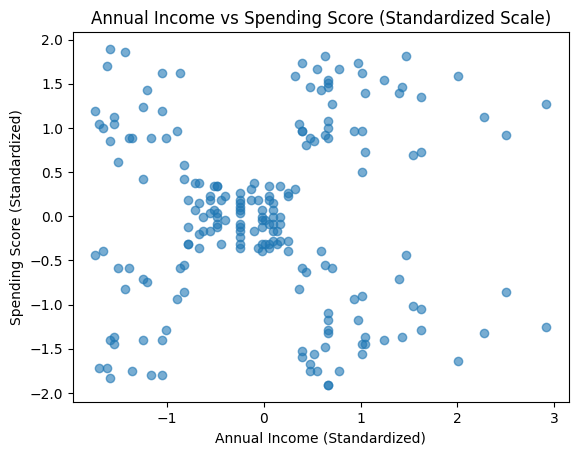

In [59]:
# Visualize the position
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[["AnnualIncome", "SpendingScore"]])

# Scatter plot with standardized data for Annual Income vs Spending Score
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], alpha=0.6)
plt.xlabel("Annual Income (Standardized)")
plt.ylabel("Spending Score (Standardized)")
plt.title("Annual Income vs Spending Score (Standardized Scale)")
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [60]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans

sse=[]
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

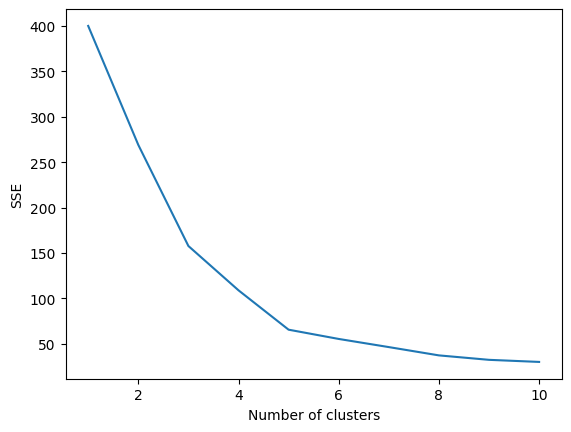

In [61]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [62]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)

The best k for you model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [63]:
# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=3, init='random', max_iter=100, random_state=42)
y_pred = kmeans.fit_predict(df)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

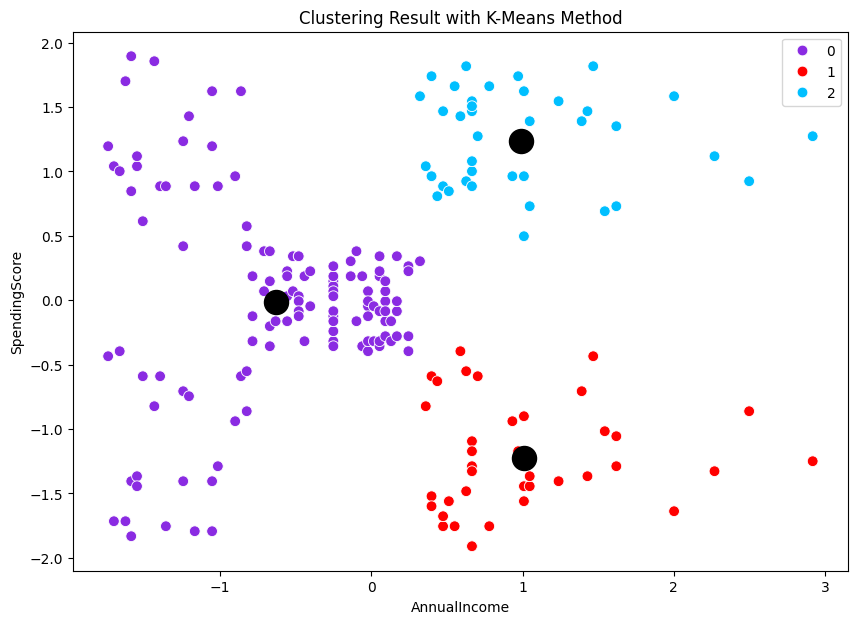

In [64]:
# visualize the result using scater chart
import seaborn as sns
plt.figure(figsize=(10,7))

sns.scatterplot(x = "AnnualIncome", y = "SpendingScore", hue=y_pred, palette=["blueviolet", "red", "deepskyblue"], data=df, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("AnnualIncome")
plt.ylabel("SpendingScore")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [65]:
# Inverse transform the scaled data to get the original values
df = pd.DataFrame(scaler.inverse_transform(df), columns=["AnnualIncome", "SpendingScore"])

# Add the cluster labels to the original data
df['Cluster'] = y_pred

# analyze the clusters with the original values
df.head()

,AnnualIncome,SpendingScore,Cluster
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,0


In [68]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_pred).agg({'AnnualIncome': ['mean', 'std', 'min', 'max'],
                                              'SpendingScore': ['mean', 'std', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

AnnualIncome                               SpendingScore            \
                mean       std       min       max          mean       std   
cluster                                                                      
0          -0.626190  0.612157 -1.738999  0.322150     -0.014392  0.764562   
1           1.009200  0.621068  0.360319  2.917671     -1.225535  0.423774   
2           0.991583  0.622638  0.322150  2.917671      1.239503  0.363544   

                             
              min       max  
cluster                      
0       -1.832378  1.894492  
1       -1.910021 -0.395980  
2        0.496916  1.816849

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

<write here>